# 各海釣り施設の釣果数

## モジュールのインポート

In [1]:
# モジュールのインポート

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime
import jpholiday
import sqlite3
import seaborn as sns

# グラフサイズ変更。既定より大きくする

plt.rcParams['figure.figsize'] = [15, 10]

# seaborn グラフにグリッド線を追加

sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

## データのロードと変換

In [2]:
from piersfan.config import Config
print(Config.get_db_path())

/home/psadmin/work/blog/choka/fishing-piers-fan/data/fishing_result.sqlite3


In [3]:
# 大黒、アジ以外の魚種で、SQLite3データベースを検索

conn = sqlite3.connect("../data/fishing_result.sqlite3")
sql = '''
select
    r.Date,
    r.Point,
    r.Species,
    r.Count,
    r.SizeMin,
    r.SizeMax,
    c.WaterTemp,
    c.Quantity
from
    fishing_results r,
    fishing_comments c
where
    r.Date = c.Date
    and r.Point = c.Point
    and r.Date >= (SELECT datetime(max(Date), '-30 day') from fishing_results)
'''
df=pd.read_sql_query(sql, conn)
df.head()

,Date,Point,Species,Count,SizeMin,SizeMax,WaterTemp,Quantity
0,2021-03-20,daikoku,アジ,134,18.0,25.0,14.0,315.0
1,2021-03-20,daikoku,イシモチ,2,24.0,25.0,14.0,315.0
2,2021-03-20,daikoku,ウミタナゴ,2,19.0,20.0,14.0,315.0
3,2021-03-20,daikoku,カサゴ,33,16.0,22.0,14.0,315.0
4,2021-03-20,daikoku,カレイ,2,34.0,35.0,14.0,315.0


In [4]:
# 日本語の文字化け対策のため、魚種をローマ字に変換

def get_spieces_alphabet(spieces):
    if spieces == 'アジ':
        return 'Aji'
    if spieces == 'クロダイ':
        return 'Kurodai'
    elif spieces == 'メジナ':
        return 'Mejina'
    elif spieces == 'メバル':
        return 'Mebaru'
    elif spieces == 'カサゴ':
        return 'Kasago'
    else:
        return 'Etc'

df['Species'] = df.apply(lambda x: get_spieces_alphabet(x.Species), axis=1)

In [5]:
df2 = df[df.Species!='Etc']

<AxesSubplot:xlabel='Species', ylabel='Count'>

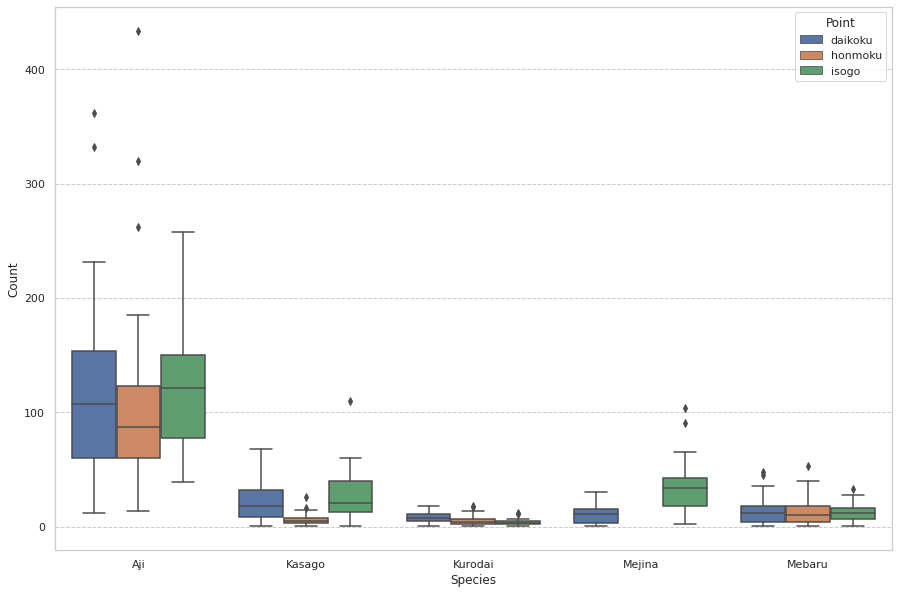

In [6]:
# 釣果数
sns.boxplot(x="Species", y="Count", hue="Point", data=df2)

<AxesSubplot:xlabel='Species', ylabel='SizeMax'>

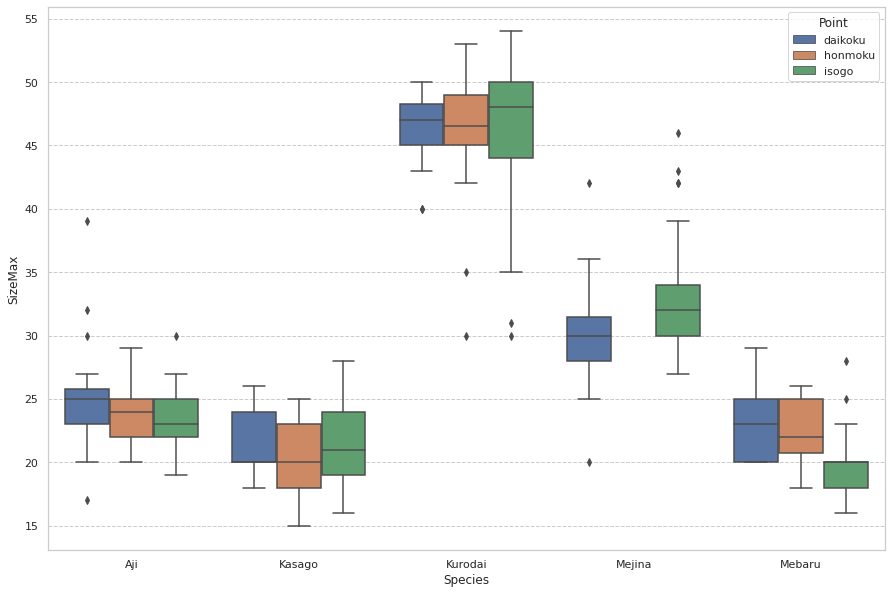

In [7]:
# サイズ
sns.boxplot(x="Species", y="SizeMax", hue="Point", data=df2)

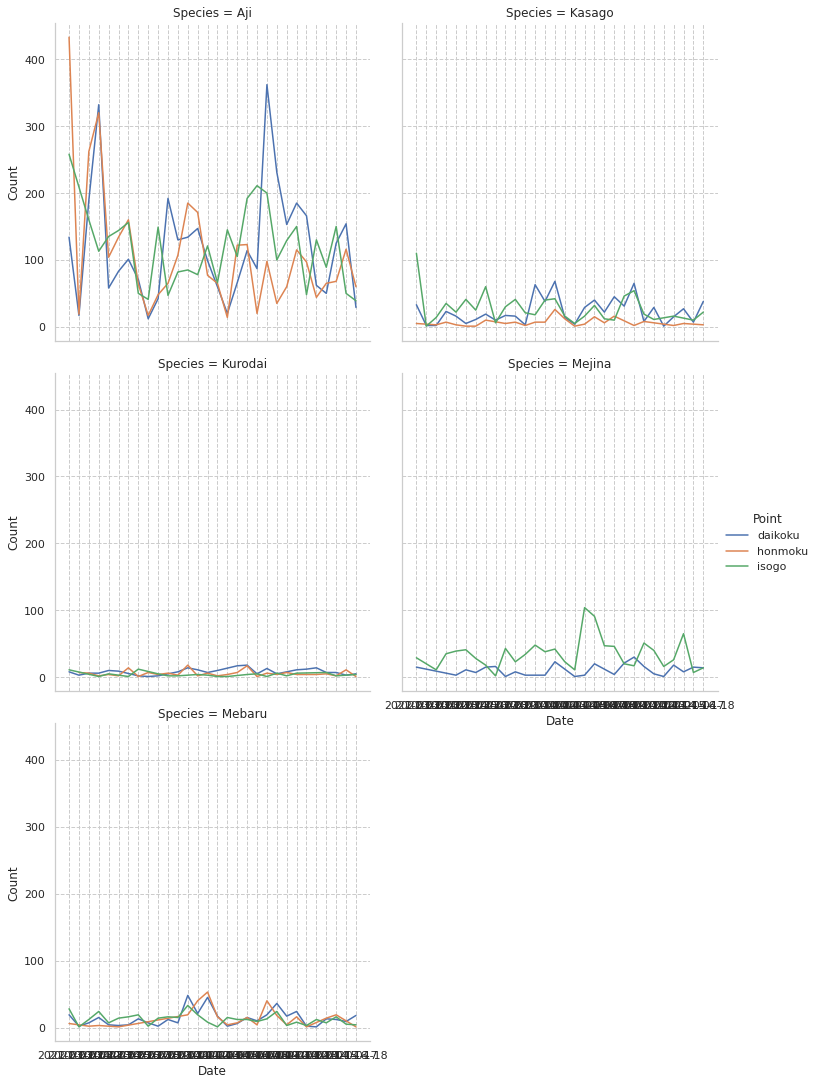

In [8]:
# 魚種サイズ、各年度グラフ
sns.relplot(data=df2, x='Date', y='Count', hue='Point', col='Species', 
            kind="line", col_wrap=2)